<a href="https://colab.research.google.com/github/amrtariq/NTI_AI_Projects/blob/main/Cifar10_CNN_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cifar10 CNN Test

##Loading and Preparing Data

In [ ]:
from tensorflow import keras
from keras.layers import Input, Dense, Dropout,Conv2D, MaxPool2D, Flatten
from tensorflow.keras import  datasets
from matplotlib import pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

0   airplane
1   automobile
2   bird
3   cat
4   deer
5   dog
6   frog
7   horse
8   ship
9   truck

[1]


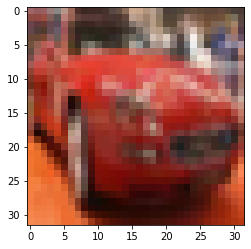

In [ ]:
plt.imshow(x_train[5],cmap="gray")
print(y_train[5])

In [ ]:
#Convert the labels into one-hot codes.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
#Normalize image pixel values.
x_train = x_train/255
x_test = x_test/255

##Model Fitting

In [ ]:
model=keras.Sequential() #Create a network sequence.

model.add(Input(shape=(32,32,3)))
model.add(Conv2D(filters=6,kernel_size = 5,strides = (1,1), padding = 'valid',activation = 'relu'))
#model.add(Conv2D(filters=6,kernel_size = 5,strides = (1,1), padding = 'valid',activation = 'relu',input_shape = (32,32,3)))
model.add(MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))

model.add(Conv2D(filters=16,kernel_size = 5,strides = (1,1), padding = 'valid',activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))

model.add(Flatten())
model.add(Dense(120,activation = 'relu'))
model.add(Dense(84,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [ ]:
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=['accuracy']) 
#model.compile(optimizer=keras.optimizers.Adam(),loss="categorical_crossentropy",metrics=['accuracy']) 
results= model.fit(x_train,y_train,epochs=20,batch_size=128,validation_data=(x_test, y_test))



Epoch 1/20
391/391 [==============================] - 9s 11ms/step - loss: 1.7526 - accuracy: 0.3604 - val_loss: 1.5608 - val_accuracy: 0.4416
Epoch 2/20
391/391 [==============================] - 2s 6ms/step - loss: 1.4730 - accuracy: 0.4712 - val_loss: 1.4451 - val_accuracy: 0.4807
Epoch 3/20
391/391 [==============================] - 2s 6ms/step - loss: 1.3623 - accuracy: 0.5129 - val_loss: 1.3405 - val_accuracy: 0.5192
Epoch 4/20
391/391 [==============================] - 2s 6ms/step - loss: 1.2862 - accuracy: 0.5408 - val_loss: 1.2988 - val_accuracy: 0.5337
Epoch 5/20
391/391 [==============================] - 2s 5ms/step - loss: 1.2345 - accuracy: 0.5594 - val_loss: 1.2681 - val_accuracy: 0.5501
Epoch 6/20
391/391 [==============================] - 2s 6ms/step - loss: 1.1867 - accuracy: 0.5778 - val_loss: 1.2444 - val_accuracy: 0.5579
Epoch 7/20
391/391 [==============================] - 2s 6ms/step - loss: 1.1451 - accuracy: 0.5939 - val_loss: 1.2400 - val_accuracy: 0.5649
Epoch

##Results

In [ ]:
score = model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 4ms/step - loss: 1.1483 - accuracy: 0.6191


313/313 [==============================] - 1s 3ms/step - loss: 1.1483 - accuracy: 0.6191


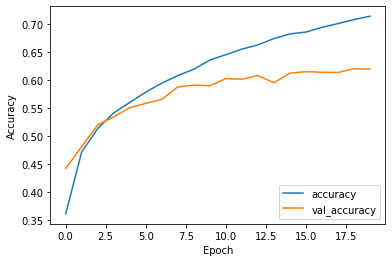

In [ ]:
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test)

Text(0, 0.5, 'Training and Validation losses')

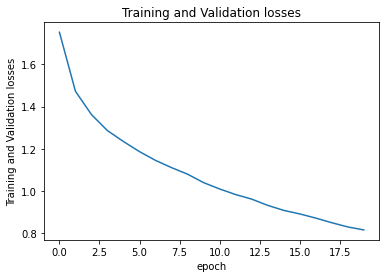

In [ ]:
plt.plot(results.history['loss'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
plt.ylabel('Training and Validation losses')

Text(0.5, 0, 'epoch')

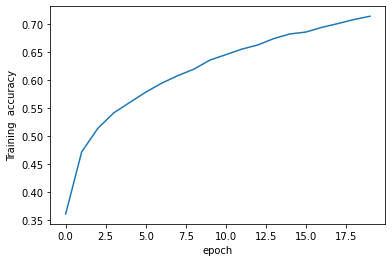

In [ ]:
import matplotlib.pyplot as plt
plt.plot(results.history['accuracy'])
plt.ylabel('Training  accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

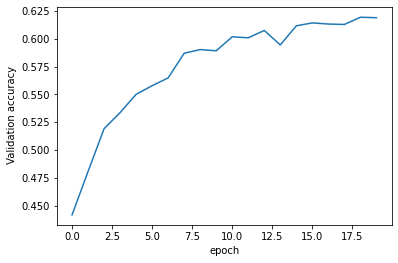

In [ ]:
import matplotlib.pyplot as plt
plt.plot(results.history['val_accuracy'])
plt.ylabel(' Validation accuracy')
plt.xlabel('epoch')